$\text{SNR} (\Delta t) = \dfrac{N_\text{electrons} \times \Delta t}{\sqrt{N_\text{e} \times \Delta t + N_\text{triggered pixels}\left(N_\text{e, sky bkg} \times \Delta t + N_\text{e, dc} \times \Delta t + \text{RON}^2\right)}}$

$ \sigma_{ADU} = \sqrt{(Im - Bias)} $   -  Poissonian uncertainty on the starting counted electrons\
$ \sigma_{Dark} = \sqrt{(Dark)} $   -  Poissonian uncertainty on the "dark" counted electrons, scale for time\
$ \epsilon $  -  Moltiplicative factor of the flat\
$ \sigma_{sky}$  -  Estimate of the uncertainty introduced by the function reducing gradient and interpolating background\

$ \sigma_{final} = \epsilon (\sigma_{ADU} + \sigma_{Dark}) + \sigma_{sky} $   -  Poissonian uncertainty on the counted electrons\

$ \sigma_{\frac{\alpha}{\beta}} = (\frac{\sigma_{\alpha}}{S_{\alpha}} + \frac{\sigma_{\beta}}{S_{\beta}}) S_{\frac{\alpha}{\beta}} $  - S indicates the signal image


# Definitions

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import glob
from astropy.io import fits

#%matplotlib inline
#%config InlineBackend.figure_format='retina'
#!pip install git+https://github.com/M-Bianchi/My_matplotlib_style
#plt.style.use('mystyle')

In [2]:
calibration_path = "Data/Calibration/"
calibration_filenames = glob.glob(calibration_path + "*fit")
data_path = "Data/Org/"
data_filenames = glob.glob(data_path + "*fit")
gain = 0.6 #electrons/ADU

In [3]:
def get_signal(filenames, masterbias, string):
    allsignal = []
    Errsignal = []

    for i, filename in enumerate (filenames):
        if(string in filenames[i]):
            mysignal = fits.open(filename)
            allsignal.append(mysignal[0].data - masterbias)
            Errsignal.append(np.sqrt(mysignal[0].data)*gain)
            mysignal.close(filename)

    allsignal = np.array(allsignal)
    N = allsignal.shape[0]

    return np.median(allsignal, axis=0), np.mean(Errsignal, axis=0)/np.sqrt(N)

In [4]:
def get_bias(filenames, string):
    allbias = []
    Errbias = []

    for i, filename in enumerate (filenames):
        if(string in filenames[i]):
            mybias = fits.open(filename)
            allbias.append(mybias[0].data)
            Errbias.append(np.sqrt(mybias[0].data)*gain)
            mybias.close(filename)

    allbias = np.array(allbias)
    N = allbias.shape[0]

    return np.median(allbias, axis=0), np.mean(Errbias, axis=0)/np.sqrt(N)

In [5]:
def get_dark(filenames, masterbias, string):
    alldark = []
    Errdark = []

    for i, filename in enumerate (filenames):
        if(string in filenames[i]):
            mydark = fits.open(filename)
            alldark.append(mydark[0].data - masterbias)
            Errdark.append(np.sqrt(mydark[0].data)*gain)
            mydark.close(filename)

    alldark = np.array(alldark)
    N = alldark.shape[0]

    return np.median(alldark, axis=0), np.mean(Errdark, axis=0)/np.sqrt(N)

# Error images

## Bias uncertainty

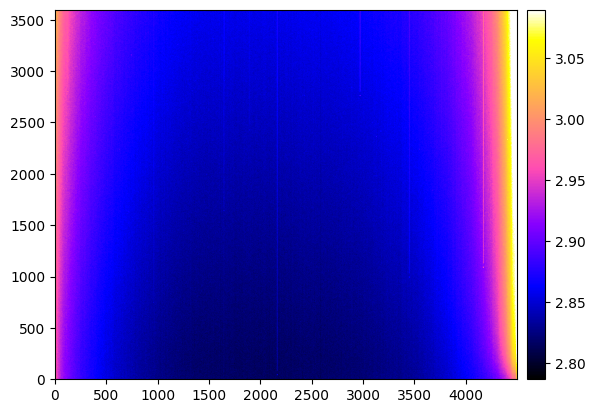

In [6]:
Bias, Errbias = get_bias(calibration_filenames,'bias')

plt.imshow(Errbias, clim=np.quantile(Errbias, [0.01, 0.99]), cmap='gnuplot2', origin='lower')
plt.colorbar(fraction=0.0375, pad=0.02)

## Signal uncertainty

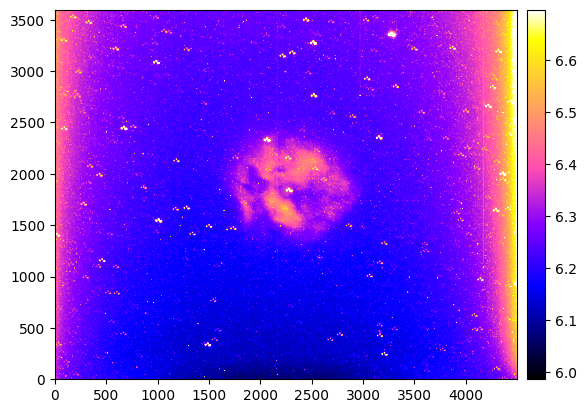

In [7]:
Signal, Errsignal = get_signal(data_filenames,Bias,'Ha')

plt.imshow(Errsignal, clim=np.quantile(Errsignal, [0.01, 0.99]), cmap='gnuplot2', origin='lower')
plt.colorbar(fraction=0.0375, pad=0.02)

## Dark uncertainty

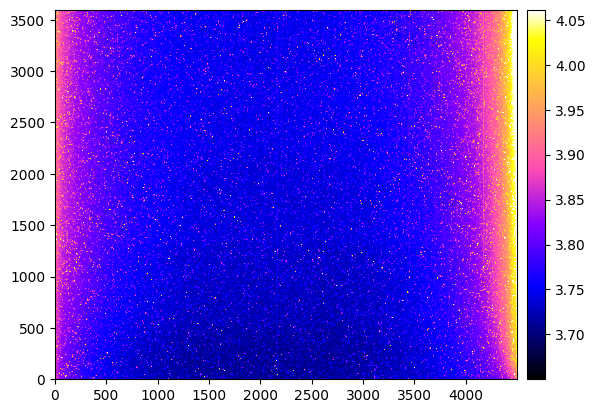

In [8]:
Dark, Errdark = get_dark(calibration_filenames,Bias,'dark1200')

plt.imshow(Errdark, clim=np.quantile(Errdark, [0.01, 0.99]), cmap='gnuplot2', origin='lower')
plt.colorbar(fraction=0.0375, pad=0.02)

## Background uncertainty

In [9]:
Errsky = 6.2   #Blatantly cheating

## Uncertainty on the final image

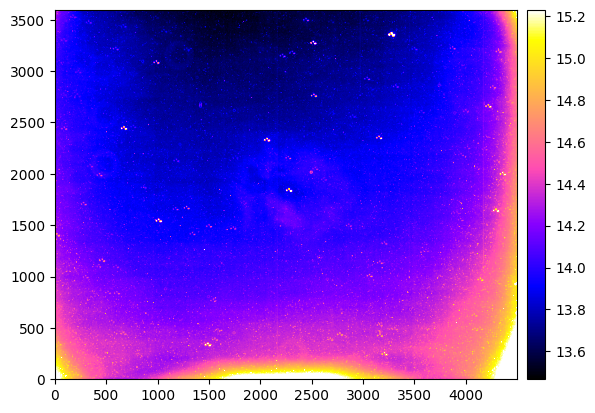

In [18]:
Epsilon = fits.open('Data/Calibration/Masterflat_Ha.fits')

Errfinal = np.sqrt(Errsignal**2+Errdark**2+Errbias**2)/Epsilon[0].data + Errsky

plt.imshow(Errfinal, clim=np.quantile(Errfinal, [0.01, 0.99]), cmap='gnuplot2', origin='lower')
plt.colorbar(fraction=0.0375, pad=0.02)